## YOUTUBE 인기채널 분석하기

#### 1. DATA 불러오기

In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('./data/youtube_rank.xlsx')
print(type(df))
original = df.copy()
original.head()

<class 'pandas.core.frame.DataFrame'>


,title,category,subscriber,view,video
0,BLACKPINK,[음악/댄스/가수],5140만,128억5130만,319개
1,Big Hit Labels,[음악/댄스/가수],4550만,120억8966만,433개
2,BANGTANTV,[음악/댄스/가수],3870만,54억7598만,"1,319개"
3,Boram Tube Vlog [보람튜브 브이로그],[키즈/어린이],2650만,110억5288만,223개
4,SMTOWN,[음악/댄스/가수],2450만,180억7532만,"3,583개"


#### 2. 데이터구조 확인하기

In [3]:
df.head()
#0/1/2/3/4 -> index
#subscriber, view, video에서 '억','만','개' 숫자가 아닌 문자로 인식됨

,title,category,subscriber,view,video
0,BLACKPINK,[음악/댄스/가수],5140만,128억5130만,319개
1,Big Hit Labels,[음악/댄스/가수],4550만,120억8966만,433개
2,BANGTANTV,[음악/댄스/가수],3870만,54억7598만,"1,319개"
3,Boram Tube Vlog [보람튜브 브이로그],[키즈/어린이],2650만,110억5288만,223개
4,SMTOWN,[음악/댄스/가수],2450만,180억7532만,"3,583개"


In [4]:
df.tail()

,title,category,subscriber,view,video
995,Ranking World,[미분류],40만,1억2752만,503개
996,급식걸즈,[취미/라이프],40만,2억3901만,226개
997,OCN,[TV/방송],40만,3억4583만,"10,071개"
998,Bravo jamoasi,[미분류],40만,6193만,25개
999,덕출 : DCTVGO,[TV/방송],40만,8249만,202개


In [5]:
# df의 행의 개수 column 정보 등 확인
df.info()
# entries 행의 갯수, 
# column 이름 확인
# 결측치없음
# dtype : object -> 문자데이터

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       1000 non-null   object
 1   category    1000 non-null   object
 2   subscriber  1000 non-null   object
 3   view        1000 non-null   object
 4   video       1000 non-null   object
dtypes: object(5)
memory usage: 39.2+ KB


In [6]:
# df의 행,열 수 확인
df.shape

(1000, 5)

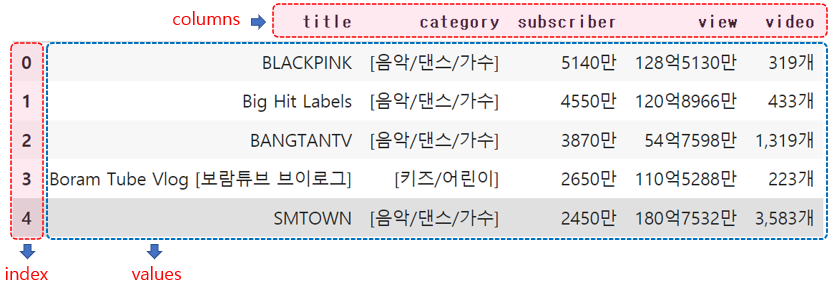

In [7]:
df.index
#0~999, 1개씩 증가

RangeIndex(start=0, stop=1000, step=1)

In [8]:
df.columns

Index(['title', 'category', 'subscriber', 'view', 'video'], dtype='object')

In [9]:
df.values

array([['BLACKPINK', '[음악/댄스/가수]', '5140만', '128억5130만', '319개'],
       ['Big Hit Labels', '[음악/댄스/가수]', '4550만', '120억8966만', '433개'],
       ['BANGTANTV', '[음악/댄스/가수]', '3870만', '54억7598만', '1,319개'],
       ...,
       ['OCN', '[TV/방송]', '40만', '3억4583만', '10,071개'],
       ['Bravo jamoasi', '[미분류]', '40만', '6193만', '25개'],
       ['덕출 : DCTVGO', '[TV/방송]', '40만', '8249만', '202개']], dtype=object)

####  3. Series의 구성요소

In [10]:
# video 컬럼의 내용 불러오기
s = df['video'] # video 컬럼의 내용은 갯수이므로 319개, 433개...
s.head()

0      319개
1      433개
2    1,319개
3      223개
4    3,583개
Name: video, dtype: object

In [11]:
temp = df[['video']] #인덱싱하고 리스트
print(temp.head())

    video
0    319개
1    433개
2  1,319개
3    223개
4  3,583개


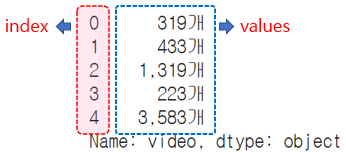

In [12]:
#series의 index
s.index

RangeIndex(start=0, stop=1000, step=1)

In [13]:
s.values[:10]

array(['319개', '433개', '1,319개', '223개', '3,583개', '2,205개', '13,291개',
       '1,181개', '112개', '2,417개'], dtype=object)

In [14]:
# indexing을 사용해서 컬럼명 변경
df.columns

Index(['title', 'category', 'subscriber', 'view', 'video'], dtype='object')

In [15]:
df.columns = ['채널','카테고리','구독자','조회수','영상']
df.head(5)

,채널,카테고리,구독자,조회수,영상
0,BLACKPINK,[음악/댄스/가수],5140만,128억5130만,319개
1,Big Hit Labels,[음악/댄스/가수],4550만,120억8966만,433개
2,BANGTANTV,[음악/댄스/가수],3870만,54억7598만,"1,319개"
3,Boram Tube Vlog [보람튜브 브이로그],[키즈/어린이],2650만,110억5288만,223개
4,SMTOWN,[음악/댄스/가수],2450만,180억7532만,"3,583개"


#### 4. dtype 변경
파일을 읽어 DataFrame 생성 시 columns 별로 dtype 자동 결정됨 그러므로 분석 목적에 맞게 변경 필요

- series.astype
- int,int32,int64,float,str,category 등으로
- np.int...numpy로 가능

In [16]:
df = original.copy()
df.head()

,title,category,subscriber,view,video
0,BLACKPINK,[음악/댄스/가수],5140만,128억5130만,319개
1,Big Hit Labels,[음악/댄스/가수],4550만,120억8966만,433개
2,BANGTANTV,[음악/댄스/가수],3870만,54억7598만,"1,319개"
3,Boram Tube Vlog [보람튜브 브이로그],[키즈/어린이],2650만,110억5288만,223개
4,SMTOWN,[음악/댄스/가수],2450만,180억7532만,"3,583개"


In [17]:
df.dtypes

title         object
category      object
subscriber    object
view          object
video         object
dtype: object

In [18]:
df.info()
#info는 다른 정보도 같이 나옴

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       1000 non-null   object
 1   category    1000 non-null   object
 2   subscriber  1000 non-null   object
 3   view        1000 non-null   object
 4   video       1000 non-null   object
dtypes: object(5)
memory usage: 39.2+ KB


In [19]:
print(df['subscriber'].dtype)

object


In [20]:
# 아래처럼 바꾸면 에러발생 -> '만'이라는 텍스트가 인식되므로 대체하거나 제거해야함
# df['subscriber'].astype('int64')
# series.replace(변경대상, 변경내용)
# series.replace([변경대상1, 변경대상2], [변경내용1,변경내용2])

In [21]:
#replace로 변경하면 만 앞에 숫자까지 덩어리로 인식해서(매치하는 값이 없어서) '만'이 그대로 나옴
df['subscriber'].replace('만','0000').head()

0    5140만
1    4550만
2    3870만
3    2650만
4    2450만
Name: subscriber, dtype: object

In [22]:
#regex(regluar expression) 정규표현, 일부 내용을 대체
df['subscriber'].replace('만','0000', regex=True).head(5)

0    51400000
1    45500000
2    38700000
3    26500000
4    24500000
Name: subscriber, dtype: object

In [23]:
# 숫자로 바꾼 상태에서 dtype 변경
df['subscriber'].replace('만','0000',regex = True).astype('int64')

0      51400000
1      45500000
2      38700000
3      26500000
4      24500000
         ...   
995      400000
996      400000
997      400000
998      400000
999      400000
Name: subscriber, Length: 1000, dtype: int64

In [24]:
df['view'].head()

0    128억5130만
1    120억8966만
2     54억7598만
3    110억5288만
4    180억7532만
Name: view, dtype: object

In [25]:
df['view'].replace(['억','만'],['','0000'],regex=True).head(5)

0    12851300000
1    12089660000
2     5475980000
3    11052880000
4    18075320000
Name: view, dtype: object

In [26]:
# 딕셔너리 매써드로 변경
df['view'].replace({'억':'','만':'0000'},regex=True).head(5)

0    12851300000
1    12089660000
2     5475980000
3    11052880000
4    18075320000
Name: view, dtype: object

In [27]:
#int64로 변경
df['view'].replace(['억','만'],['','0000'],regex=True).astype('int64').head(5)

0    12851300000
1    12089660000
2     5475980000
3    11052880000
4    18075320000
Name: view, dtype: int64

In [28]:
# 콤마, '개' 변경필요
# 메타문자 : . , + ? * ^ $ 등 메타문자 기능을 없애기 위해 \(역슬래시 사용) ''\.'
df['video'].head()

0      319개
1      433개
2    1,319개
3      223개
4    3,583개
Name: video, dtype: object

In [29]:
# 변경 할 내용이 동일하다면 한 번만 작성
df['video'].replace(['\,','개'],'',regex=True).head()
#df['video'].replace(['\,','개'],['',''],regex=True).head()

0     319
1     433
2    1319
3     223
4    3583
Name: video, dtype: object

In [30]:
df['video'].replace(['\,','개'],'',regex=True).astype('int64').head()

0     319
1     433
2    1319
3     223
4    3583
Name: video, dtype: int64

In [31]:
# category 컬럼 값 별 개수 확인
df['category'].value_counts()

[음악/댄스/가수]     175
[TV/방송]        161
[게임]           101
[키즈/어린이]        95
[음식/요리/레시피]     88
[BJ/인물/연예인]     68
[패션/미용]         57
[뉴스/정치/사회]      56
[미분류]           40
[취미/라이프]        40
[영화/만화/애니]      33
[교육/강의]         23
[애완/반려동물]       20
[스포츠/운동]        12
[IT/기술/컴퓨터]      8
[해외]             6
[주식/경제/부동산]      5
[국내/해외/여행]       5
[회사/오피셜]         4
[자동차]            2
[취미]             1
Name: category, dtype: int64

In [32]:
# category '[]' 삭제
temp = df['category'].replace({'\[','\]'},"",regex= True)
temp.value_counts()

음악/댄스/가수     175
TV/방송        161
게임           101
키즈/어린이        95
음식/요리/레시피     88
BJ/인물/연예인     68
패션/미용         57
뉴스/정치/사회      56
미분류           40
취미/라이프        40
영화/만화/애니      33
교육/강의         23
애완/반려동물       20
스포츠/운동        12
IT/기술/컴퓨터      8
해외             6
주식/경제/부동산      5
국내/해외/여행       5
회사/오피셜         4
자동차            2
취미             1
Name: category, dtype: int64

In [33]:
# 범주형으로 바꾸기
df['category'].replace(['\[','\]'],'',regex=True).astype('category')

0      음악/댄스/가수
1      음악/댄스/가수
2      음악/댄스/가수
3        키즈/어린이
4      음악/댄스/가수
         ...   
995         미분류
996      취미/라이프
997       TV/방송
998         미분류
999       TV/방송
Name: category, Length: 1000, dtype: category
Categories (21, object): ['BJ/인물/연예인', 'IT/기술/컴퓨터', 'TV/방송', '게임', ..., '키즈/어린이', '패션/미용', '해외', '회사/오피셜']

In [34]:
#str 첫번째와 마지막 글자 제거
df['category'].str[1:-1].astype('category')
# replace는 문자를 대체하는 것이라 중간에 변경 할 문자가 나오면 걔도 변경됨
# str은 지정된 위치에서 삭제
# 상황에 맞게 사용 필요(앞뒤만 삭제 할 문자면 str이 편하고, '억','만' 같이 중간에 나오는 값은 replace가 편하고)

0      음악/댄스/가수
1      음악/댄스/가수
2      음악/댄스/가수
3        키즈/어린이
4      음악/댄스/가수
         ...   
995         미분류
996      취미/라이프
997       TV/방송
998         미분류
999       TV/방송
Name: category, Length: 1000, dtype: category
Categories (21, object): ['BJ/인물/연예인', 'IT/기술/컴퓨터', 'TV/방송', '게임', ..., '키즈/어린이', '패션/미용', '해외', '회사/오피셜']

In [35]:
#최종정리
df['subscriber'] = df['subscriber'].replace('만','0000',regex=True).astype('int64')
df['view'] = df['view'].replace({'억':'','만':'0000'},regex=True).astype('int64')
df['video'] = df['video'].replace(['개','\,'],'',regex=True).astype('int32')
df['category'] = df['category'].str[1:-1].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   title       1000 non-null   object  
 1   category    1000 non-null   category
 2   subscriber  1000 non-null   int64   
 3   view        1000 non-null   int64   
 4   video       1000 non-null   int32   
dtypes: category(1), int32(1), int64(2), object(1)
memory usage: 29.2+ KB


In [36]:
#제대로 변경 되었는지 확인
df.to_excel('youtube_v1.xlsx',index=False) #index False 안하면 unnamed로 나옴
temp = pd.read_excel('./youtube_v1.xlsx')
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       1000 non-null   object
 1   category    1000 non-null   object
 2   subscriber  1000 non-null   int64 
 3   view        1000 non-null   int64 
 4   video       1000 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 39.2+ KB


#### 5. 날짜데이터 다루기

- pd.to_datetime(Series, format='형식')
- %Y: 4글자 년도, %y : 2글자 년도, %m : 2글자 월, %d : 2글자 일
- 다양한 형식 문자들 : https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
- format의 지정이 필수는 아님
- pd.Categorical(Series, categories=['범주1', '범주2', ...], ordered=None)
- ordered=True 사용시 순서 있는 범주형, 정렬시 정해진 순서가 사용됨
- categories, ordered의 지정이 필수는 아님

In [37]:
import pandas as pd
import numpy as np
temp = pd.DataFrame({'날짜_일반': ['2021/01/01', '2021/01/02', '2021/01/03', '2021/01/04', '2021/01/05'],
                     '날짜_시간': ['2021-01-01 1:12:10', '2021-01-02 1:13:45', '2021-01-03 2:50:10', '2021-01-04 3:12:30', '2021-01-05 5:40:20'],
                     '날짜_특수': ['21-01-01', '21-01-02', '21-01-03', '21-01-04', '21-01-05'],
                     '범주': ['금', '토', '일', '월', '화']})
temp

,날짜_일반,날짜_시간,날짜_특수,범주
0,2021/01/01,2021-01-01 1:12:10,21-01-01,금
1,2021/01/02,2021-01-02 1:13:45,21-01-02,토
2,2021/01/03,2021-01-03 2:50:10,21-01-03,일
3,2021/01/04,2021-01-04 3:12:30,21-01-04,월
4,2021/01/05,2021-01-05 5:40:20,21-01-05,화


In [38]:
#object 타입으로 나옴
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜_일반   5 non-null      object
 1   날짜_시간   5 non-null      object
 2   날짜_특수   5 non-null      object
 3   범주      5 non-null      object
dtypes: object(4)
memory usage: 288.0+ bytes


In [39]:
s1 = temp['날짜_일반'].astype(np.datetime64)
s1

0   2021-01-01
1   2021-01-02
2   2021-01-03
3   2021-01-04
4   2021-01-05
Name: 날짜_일반, dtype: datetime64[ns]

In [40]:
s2 = temp['날짜_시간'].astype(np.datetime64)
s2

0   2021-01-01 01:12:10
1   2021-01-02 01:13:45
2   2021-01-03 02:50:10
3   2021-01-04 03:12:30
4   2021-01-05 05:40:20
Name: 날짜_시간, dtype: datetime64[ns]

In [41]:
# 21이 연도인데 日로 보고있음, 1,2,3,4는 年으로 인식하는 에러발생
s3 =temp['날짜_특수'].astype(np.datetime64)
s3

0   2001-01-21
1   2002-01-21
2   2003-01-21
3   2004-01-21
4   2005-01-21
Name: 날짜_특수, dtype: datetime64[ns]

In [42]:
# 아예 format을 알려줌
s4 = pd.to_datetime(temp['날짜_특수'],format = '%y-%m-%d')
s4

0   2021-01-01
1   2021-01-02
2   2021-01-03
3   2021-01-04
4   2021-01-05
Name: 날짜_특수, dtype: datetime64[ns]

In [43]:
s5 = temp['범주'].astype('category')
s5.sort_values() #가나다 순서로 정렬

0    금
3    월
2    일
1    토
4    화
Name: 범주, dtype: category
Categories (5, object): ['금', '월', '일', '토', '화']

In [44]:
# 월화수목금토일 순서로 정렬
s6 = pd.Categorical(temp['범주'],categories=['월','화','수','목','금','토','일'],ordered=True)
s6
temp['범주'] = s6
temp['범주'].sort_values()

3    월
4    화
0    금
1    토
2    일
Name: 범주, dtype: category
Categories (7, object): ['월' < '화' < '수' < '목' < '금' < '토' < '일']

#### 6. YOUTUBE 인기채널 확인하기

- DataFrame.sort_values(컬럼명, ascending=True)
- DataFrame.sort_values([컬럼명1, 컬럼명2, ...], ascending=[...])
- 오름차순이 기본이며, ascending=False를 사용하여 내림차순 지정
- 1차기준, 2차기준 등 여러 개 기준이 존재하는 경우
- 1차기준 정렬 된 후, 1차기준이 같은 것 내부에서 2차기준으로 정렬됨
- 정렬방법은 각 기준별로 부여하거나, 1개만 부여할 수 있음

In [45]:
# subscriber가 가장 많은 5개의 채널은?
# 내림차순으로 정리해서 상위 5개 ascending = True :오름차순, False : 내림차순
df.sort_values('subscriber',ascending = False ).head(5)

,title,category,subscriber,view,video
0,BLACKPINK,음악/댄스/가수,51400000,12851300000,319
1,Big Hit Labels,음악/댄스/가수,45500000,12089660000,433
2,BANGTANTV,음악/댄스/가수,38700000,5475980000,1319
3,Boram Tube Vlog [보람튜브 브이로그],키즈/어린이,26500000,11052880000,223
4,SMTOWN,음악/댄스/가수,24500000,18075320000,3583


In [46]:
# view가 가장 많은 5개의 채널은?
df.sort_values('view',ascending = False).head(5)

,title,category,subscriber,view,video
4,SMTOWN,음악/댄스/가수,24500000,18075320000,3583
6,1theK (원더케이),음악/댄스/가수,20900000,17860420000,13291
8,ArianaGrandeVevo,음악/댄스/가수,18200000,14796920000,112
0,BLACKPINK,음악/댄스/가수,51400000,12851300000,319
1,Big Hit Labels,음악/댄스/가수,45500000,12089660000,433


In [47]:
# video가 가장 많은 5개의 채널은?
df.sort_values('video',ascending = False).head(5)

,title,category,subscriber,view,video
169,YTN news,뉴스/정치/사회,1970000,3801710000,492791
60,SBS Drama,TV/방송,4360000,4260860000,339029
737,연합뉴스TV,뉴스/정치/사회,550000,697650000,311370
57,SBS Entertainment,TV/방송,4490000,4516190000,210810
17,CNN,뉴스/정치/사회,10900000,7899750000,149530


In [48]:
# category로 오름차순, subscriber로 내림차순
df.sort_values(['category','subscriber'],ascending=[True,False])

,title,category,subscriber,view,video
52,[Awesome Haeun]어썸하은,BJ/인물/연예인,4840000,703070000,419
75,영국남자 Korean Englishman,BJ/인물/연예인,3940000,1160110000,411
79,워크맨-Workman,BJ/인물/연예인,3810000,469330000,76
82,waveya 2011,BJ/인물/연예인,3720000,1299280000,647
84,허팝Heopop,BJ/인물/연예인,3710000,2748310000,1685
...,...,...,...,...,...
671,AshleyMariee,해외,590000,55950000,2033
53,Samsung,회사/오피셜,4780000,585350000,1135
108,Billboard,회사/오피셜,2900000,1010800000,6100
709,미스&미스터트롯 공식계정,회사/오피셜,570000,202340000,659


Boolean indexing 사용하여 조건에 맞는 데이터 가져오기
- (※Boolean 참/거짓) 내가 넣은 조건이 True인지 False로 나옴
- DataFrame.loc[조건, :]
- DataFrame[조건]
- 조건은 boolean dtype이어야 하며 행의 수와 같아야 함
- 복잡한 조건 작성
- (조건1) | (조건2) : 조건1 또는 조건2를 만족하는 데이터
- (조건1) & (조건2) : 조건1, 조건2 모두 만족하는 데이터
- ~(조건) : 조건이 거짓인 데이터

In [49]:
temp = pd.DataFrame({'A': [1, 2, 3, 4],
                     'B': [6, 5, 4, 3],
                     'C': [3, 4, 5, 2]})
temp

,A,B,C
0,1,6,3
1,2,5,4
2,3,4,5
3,4,3,2


In [50]:
temp[[True,True,False,True]]

,A,B,C
0,1,6,3
1,2,5,4
3,4,3,2


In [51]:
# loc, 행과 열 자유롭게 가져오기
temp.loc[[False,True,False,True],['A','C']]

,A,C
1,2,4
3,4,2


In [52]:
# Category가 음악/댄스/가수 인 채널의 subscriber TOP5는?
df[df['category'] =='음악/댄스/가수'].sort_values('subscriber',ascending = False).head()

,title,category,subscriber,view,video
0,BLACKPINK,음악/댄스/가수,51400000,12851300000,319
1,Big Hit Labels,음악/댄스/가수,45500000,12089660000,433
2,BANGTANTV,음악/댄스/가수,38700000,5475980000,1319
4,SMTOWN,음악/댄스/가수,24500000,18075320000,3583
5,1MILLION Dance Studio,음악/댄스/가수,22300000,5753580000,2205


In [54]:
# Category가 TV/방송인 채널의 subscriber TOP5는?
df.loc[df['category'] == 'TV/방송',:] 

,title,category,subscriber,view,video
12,KBS World,TV/방송,14300000,10158060000,46830
22,MBCkpop,TV/방송,8670000,6339380000,38695
36,M2,TV/방송,6300000,4161860000,12135
46,KBS Kpop,TV/방송,5260000,3411260000,24389
54,스브스케이팝 / SBS KPOP,TV/방송,4590000,2637190000,20846
...,...,...,...,...,...
977,핫소스,TV/방송,410000,134640000,308
981,디바걸스,TV/방송,410000,156230000,232
985,최혜성,TV/방송,400000,94190000,281
997,OCN,TV/방송,400000,345830000,10071


In [56]:
df.loc[df['category'] == 'TV/방송',:].sort_values('view',ascending = False).head()

,title,category,subscriber,view,video
12,KBS World,TV/방송,14300000,10158060000,46830
22,MBCkpop,TV/방송,8670000,6339380000,38695
76,KBS Entertain,TV/방송,3930000,5340910000,91783
57,SBS Entertainment,TV/방송,4490000,4516190000,210810
77,MBCdrama,TV/방송,3920000,4350540000,51543


In [58]:
# subscriber가 3천만 이상인 채널은?
df[df['subscriber'] >= 30000000]

,title,category,subscriber,view,video
0,BLACKPINK,음악/댄스/가수,51400000,12851300000,319
1,Big Hit Labels,음악/댄스/가수,45500000,12089660000,433
2,BANGTANTV,음악/댄스/가수,38700000,5475980000,1319


In [62]:
# viedo 개수가 30000 이상 35000 이하인 채널은?
df[(df['video']>=30000) & (df['video']<=35000)]

,title,category,subscriber,view,video
409,TBS 시민의방송,뉴스/정치/사회,930000,582330000,30431


In [65]:
# subscriber가 3천만 이상이거나 video 개수가 50000이상인 채널은?
df.loc[(df['subscriber']>=30000000) | (df['video'] >= 50000),:]

,title,category,subscriber,view,video
0,BLACKPINK,음악/댄스/가수,51400000,12851300000,319
1,Big Hit Labels,음악/댄스/가수,45500000,12089660000,433
2,BANGTANTV,음악/댄스/가수,38700000,5475980000,1319
17,CNN,뉴스/정치/사회,10900000,7899750000,149530
27,MBCentertainment,뉴스/정치/사회,7710000,11683060000,79567
38,JTBC Entertainment,뉴스/정치/사회,6020000,7638370000,58938
57,SBS Entertainment,TV/방송,4490000,4516190000,210810
60,SBS Drama,TV/방송,4360000,4260860000,339029
76,KBS Entertain,TV/방송,3930000,5340910000,91783
77,MBCdrama,TV/방송,3920000,4350540000,51543


- Series의 value가 목록에 포함된 내용인지 확인

- Series.isin([내용1, 내용2, ...]) : Series에 포함된 내용이 목록에 있는 경우 True, 없으면 False인 Boolean - Series 반환 (Boolean indexing에 사용)

In [66]:
#category의 값 별 개수 확인
df['category'].value_counts()

음악/댄스/가수     175
TV/방송        161
게임           101
키즈/어린이        95
음식/요리/레시피     88
BJ/인물/연예인     68
패션/미용         57
뉴스/정치/사회      56
미분류           40
취미/라이프        40
영화/만화/애니      33
교육/강의         23
애완/반려동물       20
스포츠/운동        12
IT/기술/컴퓨터      8
해외             6
주식/경제/부동산      5
국내/해외/여행       5
회사/오피셜         4
자동차            2
취미             1
Name: category, dtype: int64

In [70]:
# category가 TV/방송 이거나 게임인 채널 개수는 (161+101 = 262개)
len(df[(df['category'] == 'TV/방송') |(df['category'] == '게임')])

262

In [73]:
# category 안에 TV/방송, 게임이 있다
len(df[df['category'].isin(['TV/방송','게임'])])

262

In [76]:
# category가 음악/댄스/가수인 채널의 subscriber TOP5는?
df[df['category'].isin(['음악/댄스/가수'])].sort_values('subscriber',ascending=False).head()

,title,category,subscriber,view,video
0,BLACKPINK,음악/댄스/가수,51400000,12851300000,319
1,Big Hit Labels,음악/댄스/가수,45500000,12089660000,433
2,BANGTANTV,음악/댄스/가수,38700000,5475980000,1319
4,SMTOWN,음악/댄스/가수,24500000,18075320000,3583
5,1MILLION Dance Studio,음악/댄스/가수,22300000,5753580000,2205


In [77]:
# title에 KBS가 포함된 채널 명 
df[df['title'].str.contains('KBS')]

,title,category,subscriber,view,video
12,KBS World,TV/방송,14300000,10158060000,46830
46,KBS Kpop,TV/방송,5260000,3411260000,24389
76,KBS Entertain,TV/방송,3930000,5340910000,91783
101,KBS Drama,TV/방송,3040000,3538510000,105922
290,KBS 한국방송,TV/방송,1220000,1128510000,25993
292,KBS Drama Classic,뉴스/정치/사회,1210000,1084400000,8783
308,KBS HUMAN: 뭉클티비,TV/방송,1170000,495680000,1593
389,KBS News,뉴스/정치/사회,960000,1017410000,145515
457,KBS CoolFM,TV/방송,840000,429520000,6981
716,KBS N,TV/방송,560000,747830000,12470


In [81]:
df[df['title'].str.contains('KBS')]['title'].to_numpy()

array(['KBS World', 'KBS Kpop', 'KBS Entertain', 'KBS Drama', 'KBS 한국방송',
       'KBS Drama Classic', 'KBS HUMAN: 뭉클티비', 'KBS News', 'KBS CoolFM',
       'KBS N', 'KBS KONG', 'KBS Documentary [KBS 다큐]', 'KBS 교양'],
      dtype=object)

In [83]:
df.loc[df['title'].str.contains('KBS'),'title'].to_numpy()

array(['KBS World', 'KBS Kpop', 'KBS Entertain', 'KBS Drama', 'KBS 한국방송',
       'KBS Drama Classic', 'KBS HUMAN: 뭉클티비', 'KBS News', 'KBS CoolFM',
       'KBS N', 'KBS KONG', 'KBS Documentary [KBS 다큐]', 'KBS 교양'],
      dtype=object)

In [84]:
# 대소문자 구분없이 검색하려면?
df.loc[df['title'].str.upper().str.contains('KBS'),'title'].to_numpy()

array(['KBS World', 'KBS Kpop', 'KBS Entertain', 'KBS Drama', 'KBS 한국방송',
       'KBS Drama Classic', 'KBS HUMAN: 뭉클티비', 'KBS News', 'KBS CoolFM',
       'KBS N', 'KBS KONG', 'KBS Documentary [KBS 다큐]', 'KBS 교양'],
      dtype=object)

#### 7. 통계값 구하기

- DataFrame.describe() : 적용 가능 컬럼에 대해 count, mean, std, min, max, Q1, Q2, Q3 등 구하기
- Series.count() : 개수
- Series.sum() : 합계
- Series.mean() : 평균
- Series.std() : 표준편차
- Series.var() : 분산
- Series.median() : 중앙값
- Series.mode() : 최빈값
- Series.quantile([0.25, 05, 0.75]) : 분위수

In [85]:
df.describe()

,subscriber,view,video
count,1.000000e+03,1.000000e+03,1000.000000
mean,1.645040e+06,6.722941e+08,4766.680000
std,3.422952e+06,1.588076e+09,25424.801925
min,4.000000e+05,0.000000e+00,0.000000
25%,5.400000e+05,1.095600e+08,222.000000
50%,7.800000e+05,2.423650e+08,506.000000
75%,1.392500e+06,5.351825e+08,1491.500000
max,5.140000e+07,1.807532e+10,492791.000000


In [86]:
#video 컬럼 데이터 갯수
df['video'].count()

1000

In [87]:
#video 합계
df['video'].sum()

4766680

In [88]:
# video 평균, 중앙값
df['video'].mean(), df['video'].median()

(4766.68, 506.0)

In [89]:
# video의 분산과 표준편차
df['video'].var(), df['video'].std()

(646420552.9165165, 25424.801924823652)

In [90]:
#subscriber 의 최대, 최소값
df['subscriber'].max(), df['subscriber'].min()

(51400000, 400000)

In [92]:
#subscriber 최빈값
df['subscriber'].mode()[0]

440000

In [94]:
#subscriber 사분위수 구하기
Q1,Q2,Q3 = df['subscriber'].quantile([0.25,0.5,0.75])
print(Q1,Q2,Q3)

540000.0 780000.0 1392500.0


그룹별 통계치 구하기

- DataFrame.groupby(그룹명).적용할통계함수()
- DataFrame의 함수 적용 가능 컬럼들에 대해 그룹별 통계치를 구함
- 통계함수에는 sum, mean, std, var, min, max, count, quantile 등이 있음
- DataFrame.groupby(그룹명)[컬럼].적용할통계함수() : Series
- DataFrame.groupby(그룹명)[[컬럼1, 컬럼2, ...]].적용할통계함수() : DataFrame

In [95]:
# category 별 평균을 구할 수 있는 모든 컬럼에 대한 평균 구하기
df.groupby('category').mean()

,subscriber,view,video
category,,,
BJ/인물/연예인,1.274412e+06,4.101549e+08,837.735294
IT/기술/컴퓨터,8.062500e+05,1.766100e+08,1200.125000
TV/방송,1.219876e+06,7.184834e+08,9025.130435
게임,7.435644e+05,4.542535e+08,2527.009901
교육/강의,8.513043e+05,1.772183e+08,837.913043
국내/해외/여행,6.260000e+05,1.866240e+08,830.200000
뉴스/정치/사회,1.226964e+06,1.199936e+09,42048.089286
미분류,1.429500e+06,4.090340e+08,778.050000
스포츠/운동,9.325000e+05,2.791892e+08,3954.916667


In [98]:
#category 별 view에 대한 평균 구하기
df.groupby('category')[['view']].mean()

,view
category,
BJ/인물/연예인,4.101549e+08
IT/기술/컴퓨터,1.766100e+08
TV/방송,7.184834e+08
게임,4.542535e+08
교육/강의,1.772183e+08
국내/해외/여행,1.866240e+08
뉴스/정치/사회,1.199936e+09
미분류,4.090340e+08
스포츠/운동,2.791892e+08


In [101]:
# category 별 view, video에 대한 합계 구하기
df.groupby('category')[['view','video']].sum()

,view,video
category,,
BJ/인물/연예인,27890530000,56966
IT/기술/컴퓨터,1412880000,9601
TV/방송,115675830000,1453046
게임,45879600000,255228
교육/강의,4076020000,19272
국내/해외/여행,933120000,4151
뉴스/정치/사회,67196390000,2354693
미분류,16361360000,31122
스포츠/운동,3350270000,47459
